## Relavant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/a7madmostafa/365datascience/master/20%20-%20Time%20Series%20Analysis%20in%20Python/3_Introduction%20to%20Time%20Series%20in%20Python/1_Introduction%20to%20Time%20Series%20Data%20(3%3A56)/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill()

In [3]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Removing Surplus Data

In [4]:
df_comp.rename(columns={'ftse': 'market_value'}, inplace=True)
del df_comp['dax']
del df_comp['spx']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_train, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
df_train.describe()

,market_value
count,5021.000000
mean,5089.640864
std,1017.110427
min,2876.600000
25%,4274.040000
50%,5266.060000
75%,5917.710000
max,6930.200000


## LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [7]:
df_train['returns'] = df_train.market_value.pct_change(1)*100

## ACF for Returns

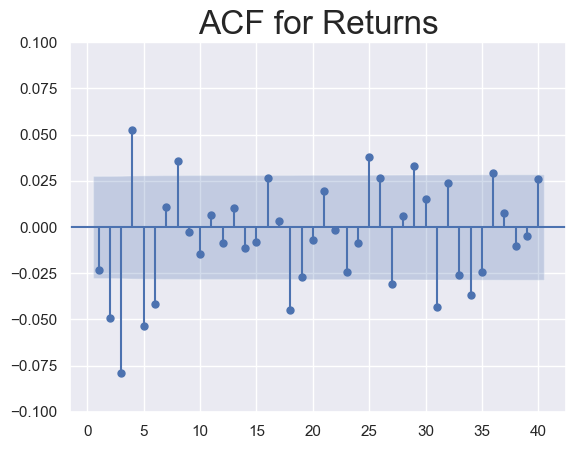

In [8]:
sgt.plot_acf(df_train.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.ylim(-0.1,0.1)
plt.show()

## MA(1) for Returns

In [9]:
model_ret_ma_1 = ARIMA(df_train.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Mon, 05 Aug 2024   AIC                          15865.190
Time:                        00:34:27   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag MA Models for Returns

In [10]:
model_ret_ma_2 = ARIMA(df_train.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Mon, 05 Aug 2024   AIC                          15853.728
Time:                        00:34:28   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [11]:
model_ret_ma_3 = ARIMA(df_train.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Mon, 05 Aug 2024   AIC                          15818.634
Time:                        00:34:30   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [12]:
model_ret_ma_4 = ARIMA(df_train.returns[1:], order=[0,0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Mon, 05 Aug 2024   AIC                          15809.547
Time:                        00:34:33   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [13]:
model_ret_ma_5 = ARIMA(df_train.returns[1:], order=[0,0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Mon, 05 Aug 2024   AIC                          15799.645
Time:                        00:34:36   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [14]:
model_ret_ma_6 = ARIMA(df_train.returns[1:], order=[0,0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Mon, 05 Aug 2024   AIC                          15794.442
Time:                        00:34:40   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [15]:
model_ret_ma_7 = ARIMA(df_train.returns[1:], order=[0,0,7])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Mon, 05 Aug 2024   AIC                          15796.091
Time:                        00:34:45   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [16]:
model_ret_ma_8 = ARIMA(df_train.returns[1:], order=[0,0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Mon, 05 Aug 2024   AIC                          15791.205
Time:                        00:34:49   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [17]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)

0.027

## Residuals for Returns

In [18]:
df_train['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [19]:
df_train.head()

,market_value,returns,res_ret_ma_8
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN
1994-01-11,3413.77,-0.779229,-0.802107
1994-01-12,3372.02,-1.222988,-1.269464
1994-01-13,3360.01,-0.356166,-0.464783


In [20]:
print("The mean of the residuals is " + str(round(df_train.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df_train.res_ret_ma_8.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.356


In [21]:
round(sqrt(df_train.res_ret_ma_8.var()),3)

1.164

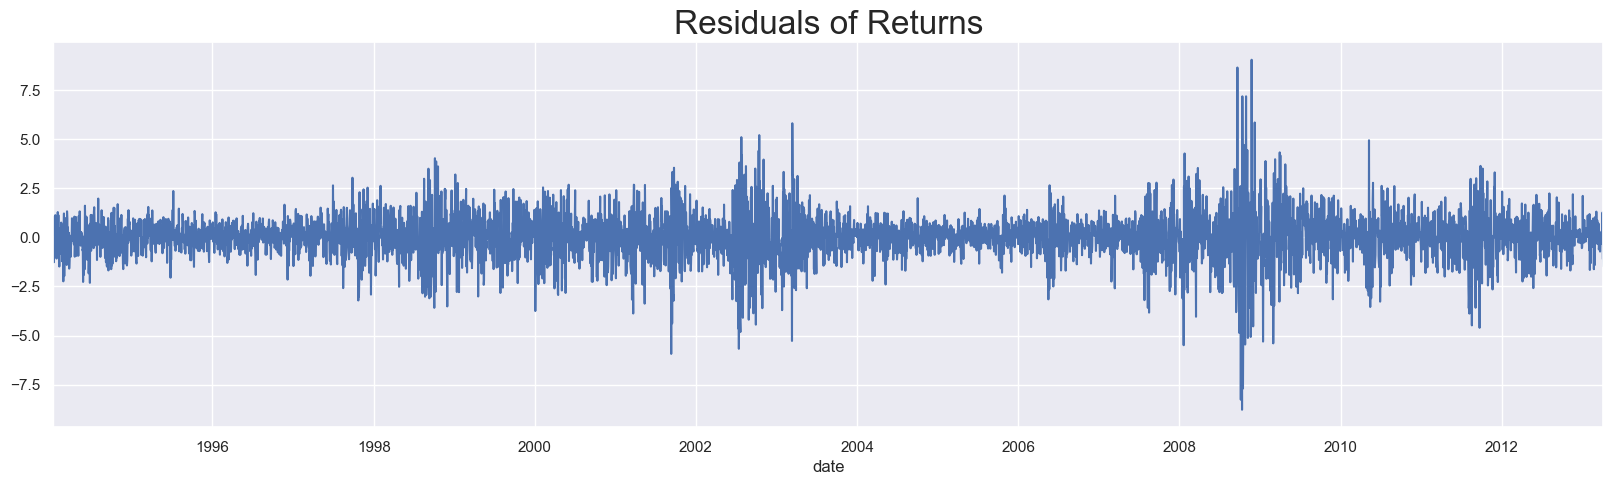

In [22]:
df_train.res_ret_ma_8[2:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [23]:
sts.adfuller(df_train.res_ret_ma_8[2:])

(-70.8353712558403,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052217389184)

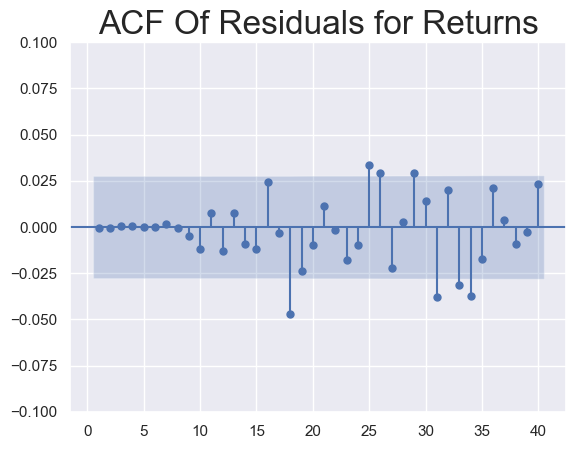

In [24]:
sgt.plot_acf(df_train.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

## Normalized Returns

In [25]:
bench_ret = df_train.returns.iloc[1]
df_train['norm_ret'] = df_train.returns.div(bench_ret).mul(100)

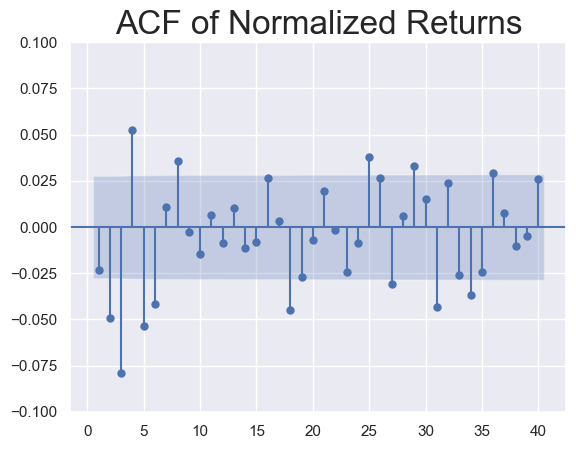

In [26]:
sgt.plot_acf(df_train.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

In [27]:
model_norm_ret_ma_8 = ARIMA(df_train.norm_ret[1:], order=(0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -40307.614
Date:                Mon, 05 Aug 2024   AIC                          80635.228
Time:                        00:35:01   BIC                          80700.440
Sample:                    01-10-1994   HQIC                         80658.079
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.658     -1.240      0.215     -30.902       6.956
ma.L1         -0.0238      0.009     -2.518      0.012      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.030      0.000      -0.066      -0.033
ma.L3         -0.0847      0.008    -10.271      0.000      -0.101      -0.069
ma.L4          0.0488      0.009      5.594      0.000       0.032       0.066
ma.L5         -0.0518      0.008     -6.281      0.000      -0.068      -0.036
ma.L6         -0.0402      0.009     -4.394      0.000      -0.058      -0.022
ma.L7          0.0084      0.009      0.935      0.350      -0.009       0.026
ma.L8          0.0365      0.009      3.866      0.000       0.018       0.055
sigma2      5.538e+05   6087.727     90.971      0.000    5.42e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6440.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
df_train['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [29]:
df_train.head()

,market_value,returns,res_ret_ma_8,norm_ret,res_norm_ret_ma_8
date,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN,100.000000,NaN
1994-01-11,3413.77,-0.779229,-0.802107,497.260711,-0.802107
1994-01-12,3372.02,-1.222988,-1.269464,780.443046,-1.269464
1994-01-13,3360.01,-0.356166,-0.464783,227.285567,-0.464783


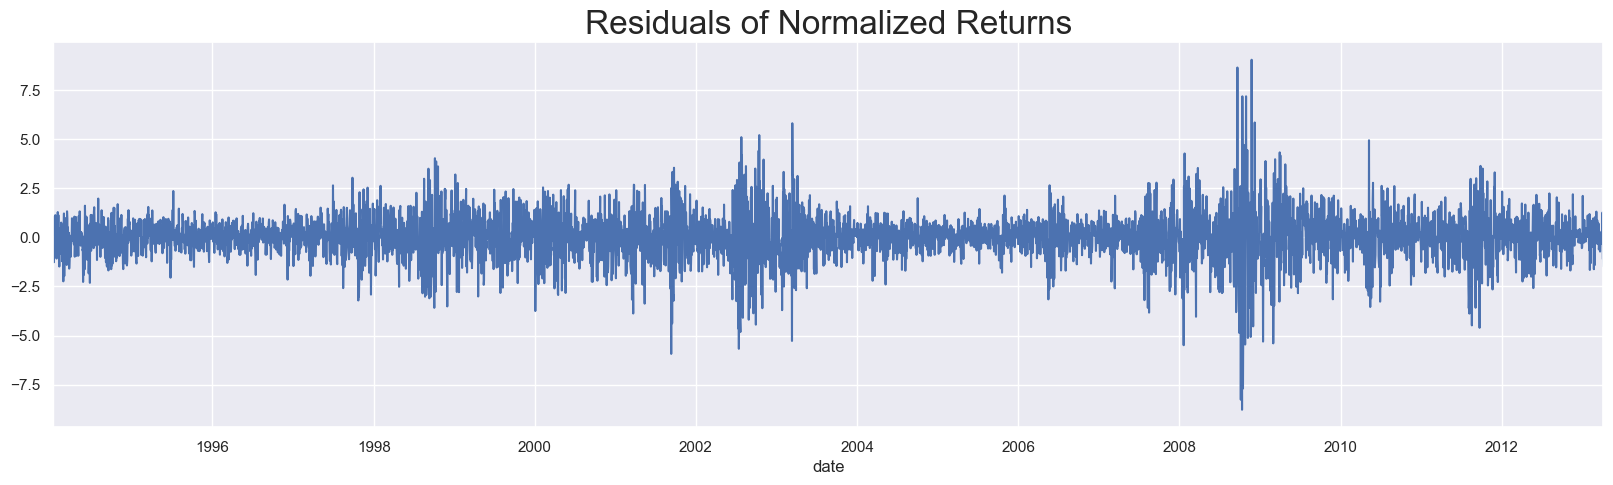

In [30]:
df_train.res_norm_ret_ma_8[2:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

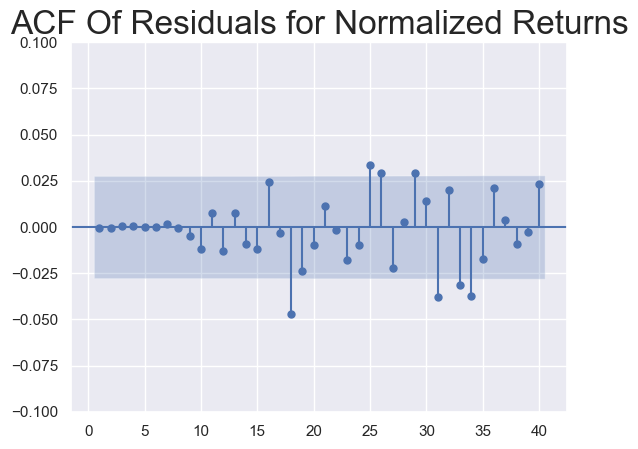

In [31]:
sgt.plot_acf(df_train.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.ylim(-0.1,0.1)
plt.show()

## MA Models For Prices

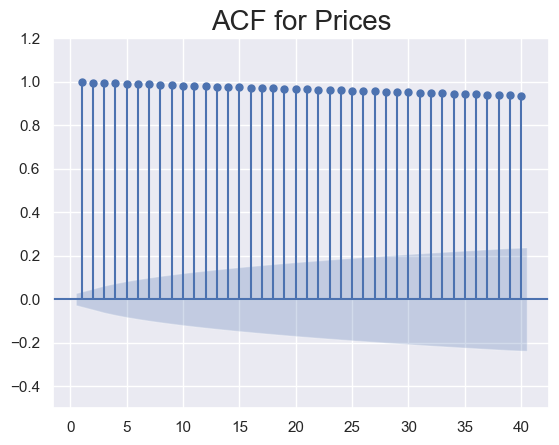

In [32]:
sgt.plot_acf(df_train.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.ylim(-0.5,1.2)
plt.show()

In [33]:
model_ma_1 = ARIMA(df_train.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38629.000
Date:                Mon, 05 Aug 2024   AIC                          77264.000
Time:                        00:35:04   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6316     15.834    321.441      0.000    5058.598    5120.665
ma.L1          0.9573      0.004    231.410      0.000       0.949       0.965
sigma2      2.817e+05   8160.550     34.519      0.000    2.66e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                4221.10   Jarque-Bera (JB):               291.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""